In [2]:
import vk_api
import time

vk_session  =  vk_api.VkApi(token='7f01bde6d027021cf83c2311fed4d2cf01bc917cb34828247016c6a0a9d820d1dbcb461369100ab7003bb')
vk = vk_session.get_api()


In [3]:
def get_friends_ids(user_id:int):
    tools = vk_api.VkTools(vk_session)
    try:
        friends = tools.get_all_iter('friends.get', 100, {'user_id': user_id})
        return list(friends)
    except vk_api.VkToolsException:
        return None
                                     

friend_ids = get_friends_ids(24566045) #user id


import  networkx as nx
graph = {}
for friend_id in friend_ids:
    print('Processing id: ',friend_id)
    graph[friend_id] = get_friends_ids(friend_id)
    time.sleep(0.1)

g = nx.Graph(directed=False)
for i in graph:
    g.add_node(i)
    if graph[i] is None:
        continue
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)


Processing id:  251215
Processing id:  377191
Processing id:  378654
Processing id:  757446
Processing id:  762592
Processing id:  788562
Processing id:  1419264
Processing id:  1426183
Processing id:  1684733
Processing id:  1783163
Processing id:  1975091
Processing id:  2560239
Processing id:  2906657
Processing id:  3660793
Processing id:  3736446
Processing id:  3739906
Processing id:  3804721
Processing id:  4024615
Processing id:  4038517
Processing id:  4088903
Processing id:  4344223
Processing id:  4932066
Processing id:  4960056
Processing id:  5046973
Processing id:  5590186
Processing id:  5671183
Processing id:  5827604
Processing id:  6295323
Processing id:  6465539
Processing id:  6619758
Processing id:  7067422
Processing id:  7130337
Processing id:  7139024
Processing id:  7330418
Processing id:  7444429
Processing id:  7491420
Processing id:  7631638
Processing id:  7632389
Processing id:  8249122
Processing id:  8417151
Processing id:  8574870
Processing id:  861580

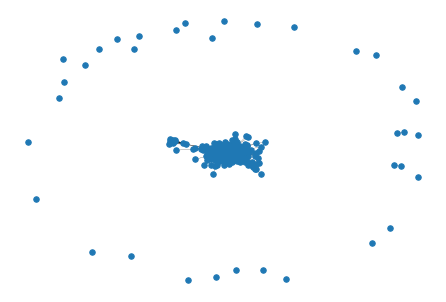

In [10]:
nx.draw(g, node_size=30, with_labels=False, width=0.2)


In [9]:
nx.write_graphml(g, 'graph.graphml')
